<a href="https://colab.research.google.com/github/amey-joshi/am/blob/master/fdtd/em_simulation_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Propagation of an electromagnetic wave in a lossy medium. The $\vec{D}$ field is computed in the code.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Physical parameters.
ke = 200          # The extent of the domain.
kc = ke//2        # The centre of the domain.
ks = 5            # Location of the soft source.
ex = np.zeros(ke) # X-component of the electric field.
dx = np.zeros(ke) # X-component of the electric displacement.
ix = np.zeros(ke) # Time domain representation of the lossy part of D-field.
hy = np.zeros(ke) # Y-component of the H-field.
c0 = 3e8          # Speed of light in vacuum.
freq_in = 700e6   # Frequency of a sinusoidal source, 700 MHz in this case.


# Artifacts for absorbing boundary layer.
lob = [0, 0] # Boundary at the lower end.
hib = [0, 0] # Boundary at the higher end.

# Dielectric parameters
epsilon_0 = 8.854e-12 # Permittivity of free space.
kappa = 4             # The relative permittivity.
sigma = 0.04          # Conductivity of the medium.

gax = np.ones(ke)
gbx = np.zeros(ke)

In [3]:
# Simulation parameters
nsteps = 500
ddx = 0.01 # Cell size.
dt  = 0.5 * ddx/c0 # Time step

gax[kc:] = 1 / (kappa + (sigma * dt / epsilon_0))
gbx[kc:] = sigma * dt / epsilon_0


In [7]:
def reset_data():
  ex[:] = 0
  ix[:] = 0
  dx[:] = 0
  hy[:] = 0
  lob = [0, 0]
  hib = [0, 0]

def compute_fields(t):
  for k in range(1, ke):
    dx[k] += 0.5 * (hy[k-1] - hy[k])

  dx[ks] = np.sin(2*np.pi*freq_in*dt*t)

  for k in range(1, ke):
    ex[k] = gax[k] * (dx[k] - ix[k])
    ix[k] = ix[k] + gbx[k] * ex[k]

  # Update the boundary values
  ex[0] = lob.pop(0)
  lob.append(ex[1])

  ex[ke-1] = hib.pop(0)
  hib.append(ex[ke-2])

  for k in range(ke - 1):
    hy[k] += 0.5 * (ex[k] - ex[k+1])

def plot_e_field():
  plt.rcParams['font.size'] = 12
  plt.figure(figsize=(8, 4))
  plt.plot(ex, color='k', linewidth=1)
  plt.ylabel('E$_x$', fontsize='14')
  plt.xticks(np.arange(0, 199, step=20))
  plt.xlim(0, 199)
  plt.yticks(np.arange(-1, 1.2, step=1))
  plt.ylim(-1.2, 1.2)
  plt.text(50, 0.5, f'T = {t}',  horizontalalignment='center')
  plt.plot(gbx / gbx[kc], 'k--',
  linewidth=0.75) # Scaled for plotting
  plt.text(170, 0.5, rf'$\kappa$ = {kappa}', horizontalalignment='center')
  plt.text(170, -0.5, rf'$\sigma$ = {sigma}', horizontalalignment='center')
  plt.xlabel('FDTD cells')
  plt.subplots_adjust(bottom=0.25, hspace=0.45)
  plt.show()



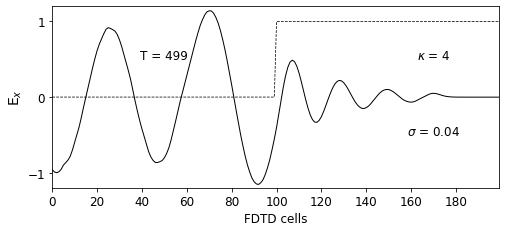

In [9]:
reset_data()

for t in range(nsteps):
  compute_fields(t)

plot_e_field()